## Product recommendation system

In this notebook i have made recommendation system using customer's reviews and rating. Have done some sentimental analysis on review columns then created new column which useful for recommendation.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textblob
%matplotlib inline

In [2]:
amzn_df = pd.read_csv('D:/brainybeam/amazonReviews/amazon_product.csv', encoding='utf-8')

In [3]:
amzn_df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,categories
0,B00004Y2UT,"[0, 0]",5.0,"amazon kindle is always the best ebook, upgrad...","07 6, 2008",A3M1PLEYNDEYO8,"G. Thomas ""Tom""",Great cable,1215302400,"Computers,Electronics Features,Tablets,Electro..."
1,B00004Y2UT,"[6, 6]",5.0,If you really want to have a good read on some...,"04 19, 2012",A2NYK9KWFMJV4Y,"Mike Tarrani ""Jazz Drummer""",One of the best instrument cables within the b...,1334793600,"Computers,Electronics Features,Tablets,Electro..."
2,B000068NSX,"[3, 3]",5.0,Great product and service will refer to a frie...,"03 18, 2013",A2EZWZ8MBEDOLN,Charlo,So far so good. Will revisit at the 6 month m...,1363564800,"Computers,Electronics Features,Tablets,Electro..."
3,B000068NSX,"[0, 0]",4.0,I was looking for a kindle whitepaper. I saw o...,"03 16, 2012",A1GMWTGXW682GB,MetalFan,"Cheap and cool looking, good length",1331856000,"Computers,Electronics Features,Tablets,Electro..."
4,B000068NVI,"[0, 0]",5.0,My fianc√©e really enjoyes it! I would definit...,"05 26, 2012",A1LQC225SE8UNI,David Burch,Does what it's supposed to do,1337990400,"Computers,Electronics Features,Tablets,Electro..."
...,...,...,...,...,...,...,...,...,...,...
2003,B000EELB8W,"[1, 1]",5.0,Amazon keeps getting better. Tablet now has op...,"12 26, 2011",A23AKO4BZLZ8DE,stefanj,Does what it says,1324857600,"Computers/Tablets & Networking,Tablets & eBook..."
2004,B000EELB8W,"[0, 0]",5.0,This is not like other android tablets in a ba...,"06 27, 2014",A3ITN3125FJETP,Tachyon,Polish that Axe,1403827200,"Computers/Tablets & Networking,Tablets & eBook..."
2005,B000EELB8W,"[1, 1]",5.0,I love my Amazon Fire tablet it does exactly w...,"04 16, 2012",AKAVVQMXSAIGX,Taoshaman,Does the job without damage,1334534400,"Computers/Tablets & Networking,Tablets & eBook..."
2006,B000EELB8W,"[0, 0]",4.0,I bought the fire because I had heard it was a...,"02 27, 2013",A3HKZSCGFU9T2A,Teagan Mago,It seems to work well,1361923200,"Computers/Tablets & Networking,Tablets & eBook..."


In [4]:
amzn_df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'categories'],
      dtype='object')

#### Droping columns
Here droped some columns. In this columns some are useful for doing recommendation nicely. But this is basic idea of it. In this notebook i have used only ratings columns. so..,

In [5]:
amzn_df2 = amzn_df.drop(['helpful','reviewTime','reviewerName','unixReviewTime','categories'],axis=1)

In [6]:
amzn_df2

,asin,overall,reviewText,reviewerID,summary
0,B00004Y2UT,5.0,"amazon kindle is always the best ebook, upgrad...",A3M1PLEYNDEYO8,Great cable
1,B00004Y2UT,5.0,If you really want to have a good read on some...,A2NYK9KWFMJV4Y,One of the best instrument cables within the b...
2,B000068NSX,5.0,Great product and service will refer to a frie...,A2EZWZ8MBEDOLN,So far so good. Will revisit at the 6 month m...
3,B000068NSX,4.0,I was looking for a kindle whitepaper. I saw o...,A1GMWTGXW682GB,"Cheap and cool looking, good length"
4,B000068NVI,5.0,My fianc√©e really enjoyes it! I would definit...,A1LQC225SE8UNI,Does what it's supposed to do
...,...,...,...,...,...
2003,B000EELB8W,5.0,Amazon keeps getting better. Tablet now has op...,A23AKO4BZLZ8DE,Does what it says
2004,B000EELB8W,5.0,This is not like other android tablets in a ba...,A3ITN3125FJETP,Polish that Axe
2005,B000EELB8W,5.0,I love my Amazon Fire tablet it does exactly w...,AKAVVQMXSAIGX,Does the job without damage
2006,B000EELB8W,4.0,I bought the fire because I had heard it was a...,A3HKZSCGFU9T2A,It seems to work well


**Unnique values of product and customers**

In [7]:
print('Unique products: ',len(amzn_df2['asin'].unique()))
print('Unique reviewer: ',len(amzn_df2['reviewerID'].unique()))

Unique products:  218
Unique reviewer:  847


**Columns information like data types, non-null values**

In [8]:
amzn_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        2008 non-null   object 
 1   overall     2008 non-null   float64
 2   reviewText  2008 non-null   object 
 3   reviewerID  2008 non-null   object 
 4   summary     2008 non-null   object 
dtypes: float64(1), object(4)
memory usage: 78.6+ KB


#### Importing libraries which are useful for natural language processing.

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk import pos_tag
import string
import json
import re

Here function name `processedSent()` for preprocessing of review column.
- Here we remove puctuations, stop words links and adding contraction and words inplace of emoji's which are useful for recommendation.
- In stopwords there are some which are useful for this system for removing them and made `new_stop_words` list.
- Tokenizeing sentences and then lemmatizing them.

In [10]:
def processedSent(text):
    
    puctuation = string.punctuation
    
    words = stopwords.words('English')
    
    remove_stopwords = ['but', 'if', 'or', 'because', 'until', 'against', 'before', 'after', 'from', 'up', 'down', 
                        'in', 'out', 'on', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
                        'only', 'so', 'than', 'too', 'very','same']
    
    new_stop_words = [i for i in words if i not in remove_stopwords]
    
    positions = ['a', 'n', 'v', 'r', 's']
    
    lm = WordNetLemmatizer()
    
    #contraction
    with open('D:/brainybeam/contractions.json', 'r') as f:
        contractions_dict = json.load(f)
    contractions = contractions_dict
        
    for i in text.split(' '):
        if i in contractions:
            text = text.replace(i, contractions[i].lower())
    
    text = text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) #remove links
    
    text = re.sub(r"\d+", "", str(text))                          #remove digits
    
    ##removing emoji's
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', text)
    
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', text)
    
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' positiveemoji ', text)
    
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', text)
    
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', text)
    
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', text)
    
    text = re.sub(r'(<br />)', ' ', text)                         #remove <br> tag

    text = re.sub(r"\s+", " ", str(text))                         #remove extra space
    
    
            
    #removing punctuations
    prcs_text1 = []
    for i in text:
        if i not in puctuation:
            prcs_text1.append(i)
    prcs_text1 = ''.join(prcs_text1)
            
    #lemmatization
    prcs_text2 = []
    for token,tag in pos_tag(word_tokenize(prcs_text1)):
        pos = tag[0].lower()
        if pos not in positions:
            pos = 'n'
            
        y = lm.lemmatize(token, pos)
        prcs_text2.append(y)
    
    #removing stopwords    
    prcs_text3 = []
    for i in prcs_text2:
        if i not in new_stop_words:
            prcs_text3.append(i)

    final_data = ' '.join(prcs_text3)

    return final_data

In [11]:
texts = amzn_df2['reviewText'].values

In [12]:
amzn_df2['prcs_text'] = amzn_df2['reviewText'].apply(processedSent)

Here four function `sentiment`, `sentiment_type`, `new_score`, `typecast`
- After preprocessing, usign **TextBlob** derive sentiment polarity.
- Then giving them sentiment type if value is `<0 then negative`, `>0 then positive`, `else neutral`. 
- Then converting rating float to int.
- Create updated score by multiplying rating and sentiment polarity.
- Then giving new score.

In [13]:
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
    
def sentiment_type(sentiment):
    if sentiment<0:
        st = 'Negative'
    elif sentiment>0:
        st = 'Positive'
    else:
        st = 'Neutral'
    return st

def new_score(up_score):
    if up_score<0:
        new_score = 1
    elif up_score>0 and up_score<=2:
        new_score = 2
    elif up_score>2 and up_score<=3:
        new_score = 3
    elif up_score>3 and up_score<=4:
        new_score = 4
    else:
        new_score = 5
    return new_score

def typecast(x):
    return int(x)

In [14]:
amzn_df2['sentiment'] = amzn_df2['prcs_text'].apply(sentiment)
amzn_df2['sentiment_type'] = amzn_df2['sentiment'].apply(sentiment_type)
amzn_df2['overall_int'] = amzn_df2['overall'].apply(typecast)
amzn_df2['updated_score'] = amzn_df2['sentiment'] * amzn_df2['overall_int']
amzn_df2['new_score'] = amzn_df2['updated_score'].apply(new_score)

In [15]:
amzn_df2.head()

,asin,overall,reviewText,reviewerID,summary,prcs_text,sentiment,sentiment_type,overall_int,updated_score,new_score
0,B00004Y2UT,5.0,"amazon kindle is always the best ebook, upgrad...",A3M1PLEYNDEYO8,Great cable,amazon kindle always best ebook upgrade every ...,0.568182,Positive,5,2.840909,3
1,B00004Y2UT,5.0,If you really want to have a good read on some...,A2NYK9KWFMJV4Y,One of the best instrument cables within the b...,if really want good read on something digital ...,0.278611,Positive,5,1.393056,2
2,B000068NSX,5.0,Great product and service will refer to a frie...,A2EZWZ8MBEDOLN,So far so good. Will revisit at the 6 month m...,great product service refer friend sale man r ...,0.750000,Positive,5,3.750000,4
3,B000068NSX,4.0,I was looking for a kindle whitepaper. I saw o...,A1GMWTGXW682GB,"Cheap and cool looking, good length",look kindle whitepaper saw online deal order o...,0.233333,Positive,4,0.933333,2
4,B000068NVI,5.0,My fianc√©e really enjoyes it! I would definit...,A1LQC225SE8UNI,Does what it's supposed to do,fianc√©e really enjoy would definitely recommend,0.200000,Positive,5,1.000000,2


#### Data analysis

In [16]:
pnn_review = amzn_df2['sentiment_type'].value_counts()

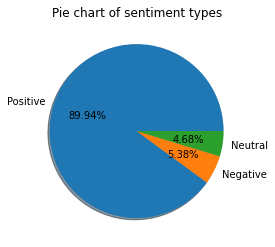

In [17]:
plt.pie(pnn_review, labels=pnn_review.index, autopct='%0.2f%%', shadow=True)
plt.title('Pie chart of sentiment types')
plt.show()

In [18]:
review_count = amzn_df2['overall_int'].value_counts()

In [19]:
new_score_count = amzn_df2['new_score'].value_counts()

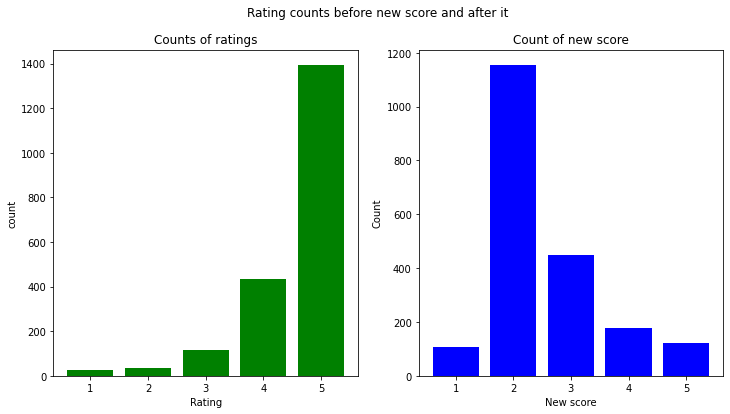

In [20]:
plt.figure(figsize=(12,6))
plt.suptitle('Rating counts before new score and after it')

plt.subplot(1,2,1)
plt.bar(review_count.index, review_count, color='g')
plt.title('Counts of ratings')
plt.xlabel('Rating')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.bar(new_score_count.index, new_score_count, color='b')
plt.title('Count of new score')
plt.xlabel('New score')
plt.ylabel('Count')
plt.show()

In [21]:
review_id_count = amzn_df['reviewerID'].value_counts()[:10]

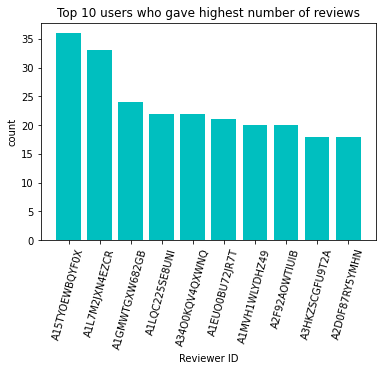

In [22]:
plt.bar(review_id_count.index, review_id_count, color='c')
plt.title('Top 10 users who gave highest number of reviews')
plt.xlabel('Reviewer ID')
plt.ylabel('count')
plt.xticks(rotation=75)
plt.show()

In [23]:
product_count = amzn_df['asin'].value_counts()[:10]

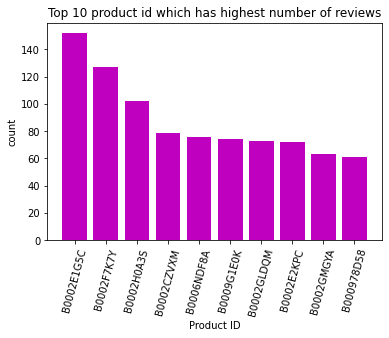

In [24]:
plt.bar(product_count.index, product_count, color='m')
plt.title('Top 10 product id which has highest number of reviews')
plt.xlabel('Product ID')
plt.ylabel('count')
plt.xticks(rotation=75)
plt.show()

In [25]:
import wordcloud

In [26]:
wc = wordcloud.WordCloud(width=800, height=800, margin=3, max_words=300)
wc1 = wc.generate(''.join(amzn_df2['prcs_text']))

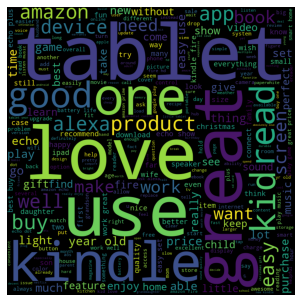

In [27]:
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Labelencoding product id and customer id

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

amzn_df2['le_productid'] = le.fit_transform(amzn_df2['asin'])
amzn_df2['le_userid'] = le.fit_transform(amzn_df2['reviewerID'])

#### Pivot table of product id, user id and new score

In [29]:
amzn_df2_pivot = amzn_df2.pivot_table(index='asin', columns='le_userid', values='new_score').fillna(0)

In [30]:
amzn_df2_pivot

le_userid,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
asin,,,,,,,,,,,,,,,,,,,,,
B00004Y2UT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000068NSX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000068NVI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000068NW5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000068NZG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000KGYAYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000KIPTE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000KIPUQG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Making csr matrix from pivot table
It will show which user give how much rating to any product.

In [31]:
from scipy.sparse import csr_matrix

amzn_df2_pivot_matrix = csr_matrix(amzn_df2_pivot.values)
# amzn_df2_pivot_matrix

#### Finding cosine similarity using pivot table

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity_array = cosine_similarity(amzn_df2_pivot)

In [34]:
similarity_array.shape

(218, 218)

#### Defining NearestNeighbors model

In [35]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(n_neighbors=10, radius=5, metric='cosine')

#### Fitting model on  csr matrix

In [36]:
model_knn.fit(amzn_df2_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=10, radius=5)

#### Final step for recommenadtion
- here user give an input of product id (product name), then it will find nearest neighbors. 
- We can give as many nubers of neighbours as we want in `n_neighbors` argument.

In [37]:
product_ID = input('Enter product id: ')
data = amzn_df2_pivot.index.to_list()
# data

query_index = data.index(product_ID)

distance, indices = model_knn.kneighbors(amzn_df2_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

product_ids = amzn_df2_pivot.index[indices.flatten()]

distance = distance.flatten()

distance_new = []
for i in distance:
    x = round(i, ndigits=2)
    distance_new.append(x)

rcmnd_lst = list(zip(product_ids,distance_new))

rcmd_df = pd.DataFrame(rcmnd_lst, columns=['product_id','distance'])
rcmd_df[1:]

Enter product id:  B00004Y2UT


,product_id,distance
1,B0002E37MM,0.17
2,B0002F7IN0,0.17
3,B0002GXV2Q,0.31
4,B0006ZXG00,0.41
5,B0002E5518,0.45


There is more work can be done in this system in future..